# **Importing the Libraries**

In [93]:
!pip install catboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

# **Data Exploration**

In [2]:
data = pd.read_csv("/content/diabetes.csv", encoding_errors = "ignore")
print("The shape of the data is :", data.shape)
print("The number of rows in the data is :", data.shape[0])
print("The number of columns in the data is :", data.shape[1])

The shape of the data is : (768, 9)
The number of rows in the data is : 768
The number of columns in the data is : 9


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
data['Pregnancies'].min()

0

In [5]:
data['Pregnancies'].max()

17

In [6]:
data['Pregnancies'].values

array([ 6,  1,  8,  1,  0,  5,  3, 10,  2,  8,  4, 10, 10,  1,  5,  7,  0,
        7,  1,  1,  3,  8,  7,  9, 11, 10,  7,  1, 13,  5,  5,  3,  3,  6,
       10,  4, 11,  9,  2,  4,  3,  7,  7,  9,  7,  0,  1,  2,  7,  7,  1,
        1,  5,  8,  7,  1,  7,  0,  0,  0,  2,  8,  5,  2,  7,  5,  0,  2,
        1,  4,  2,  5, 13,  4,  1,  1,  7,  5,  0,  2,  3,  2,  7,  0,  5,
        2, 13,  2, 15,  1,  1,  4,  7,  4,  2,  6,  2,  1,  6,  1,  1,  1,
        0,  1,  2,  1,  1,  4,  3,  0,  3,  8,  1,  4,  7,  4,  5,  5,  4,
        4,  0,  6,  2,  5,  0,  1,  3,  1,  1,  0,  4,  9,  3,  8,  2,  2,
        0,  0,  0,  5,  3,  5,  2, 10,  4,  0,  9,  2,  5,  2,  1,  4,  9,
        1,  8,  7,  2,  1,  2, 17,  4,  7,  0,  2,  0,  6,  3,  4,  4,  3,
        6,  6,  2,  1,  2,  8,  6,  0,  5,  5,  6,  0,  1,  5,  4,  7,  8,
        1,  8,  5,  3,  9,  7, 11,  8,  5,  1,  3,  4,  4,  0,  1,  0,  2,
        6,  5,  8,  5,  1,  7,  2,  0,  7,  0,  9, 12,  5,  6,  5,  5,  0,
        2,  7,  7,  1,  1

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# data description
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# data null counts
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Dealing with data inconsistancy
data["Pregnancies"] = data["Pregnancies"].astype("object")

In [12]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    object 
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [13]:
# separate_categorical_and_continious()

In [14]:
categorical = [var for var in data.columns if data[var].dtypes=='O']
numerical = [var for var in data.columns if data[var].dtypes!='O']

In [15]:
categorical

['Pregnancies']

In [16]:
numerical

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [17]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
for i in data.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [19]:
for i in data.columns:
    print(data[i].dtypes)

object
int64
int64
int64
int64
float64
float64
int64
int64


In [20]:
data['Pregnancies'].dtypes

dtype('O')

In [21]:
data['Glucose'].dtypes

dtype('int64')

In [22]:
def separate_categorical_and_continious(data):
    categorical_cols, numerical_cols = [] , []
    for cols in data.columns:
        if data[cols].dtypes == "object":
            categorical_cols.append(cols)
        else:
            numerical_cols.append(cols)
    return categorical_cols, numerical_cols

In [23]:
# df = pd.read_csv(df_path)
categorical_cols, numerical_cols = separate_categorical_and_continious(data)

In [24]:
categorical_cols, numerical_cols

(['Pregnancies'],
 ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age',
  'Outcome'])

# **Uni-Variate Analysis**

In [25]:
data["Pregnancies"].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [26]:
data["Pregnancies"].value_counts().values

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28,  24,  11,  10,
         9,   2,   1,   1])

In [27]:
data["Pregnancies"].value_counts().index

Int64Index([1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12, 14, 15, 17], dtype='int64')

<Axes: >

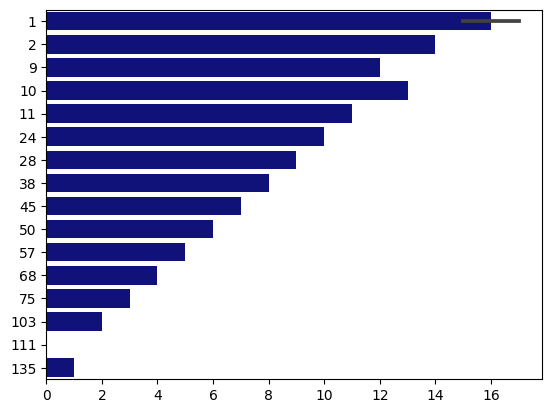

In [28]:
sns.barplot(x=data["Pregnancies"].value_counts().index,
            y=data["Pregnancies"].value_counts().values, color = "darkblue", orient = "h")

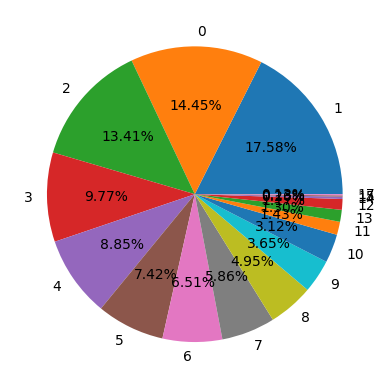

In [29]:
plt.pie(labels=data["Pregnancies"].value_counts().index,
        x=data["Pregnancies"].value_counts().values, autopct = '%1.2f%%')
plt.show();

In [30]:
# for col in data.columns:
#     plt.subplot(1,2,1)
#     plt.bar(data=data, x="Pregnancies", y="DiabetesPedigreeFunction")
#     plt.subplot(1,2,2)
#     plt.pie(data=data, x="Pregnancies", y="DiabetesPedigreeFunction",autopct = '%.1f%%')
#     plt.grid()
#     plt.show()

In [31]:
def univariate_analysis(data):
    # Plot cat charts --> bar and pie
    # Plot contnious charts --> historam and boxplot
    for cols in data.columns:
        # If the col is representing a category
        if data[cols].dtypes == "object":
            plt.figure(figsize = [10,8])
            # This is for the first subplot
            plt.subplot(1,2,1)
            sns.barplot(x=data[cols].value_counts().index,
                        y=data[cols].value_counts().values,
                        color = "darkblue",
                        orient = "h")
            # This is for the second subplot
            plt.subplot(1,2,2)
            plt.pie(labels=data[cols].value_counts().index,
                    x=data[cols].value_counts().values,
                    autopct = '%1.2f%%')
            plt.title("Categorical Distribution of the {}".format(cols))
            plt.show();
            
        # If the col is representing a numerical field
        else:
            plt.figure(figsize = [10,8])
            # This is for the first subplot
            plt.subplot(1,2,1)
            sns.histplot(x = cols, data = data, color = "darkblue")
            # This is for the second subplot
            plt.subplot(1,2,2)
            sns.boxplot(x = cols, data = data, color = "darkblue")
            plt.title("Continious Distribution of the {}".format(cols))
            plt.show();

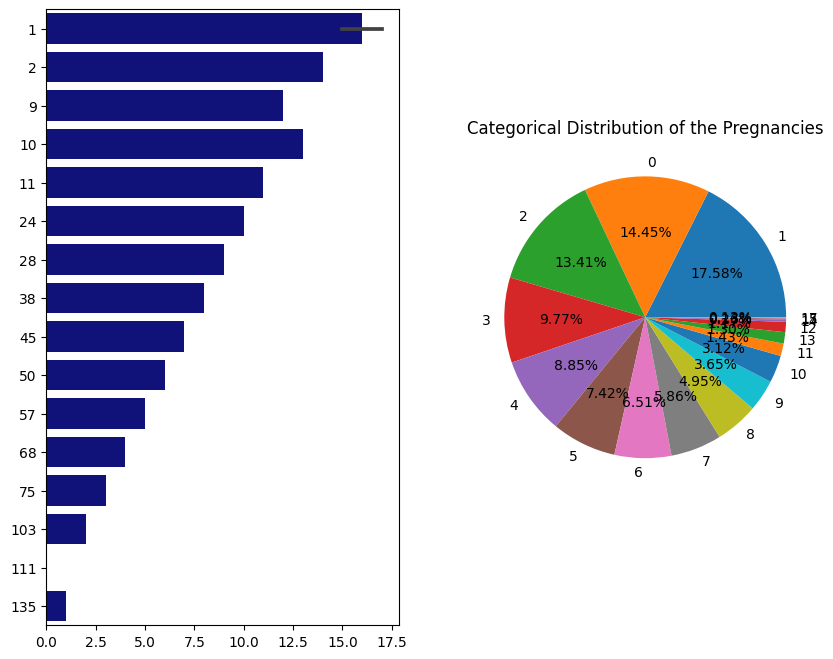

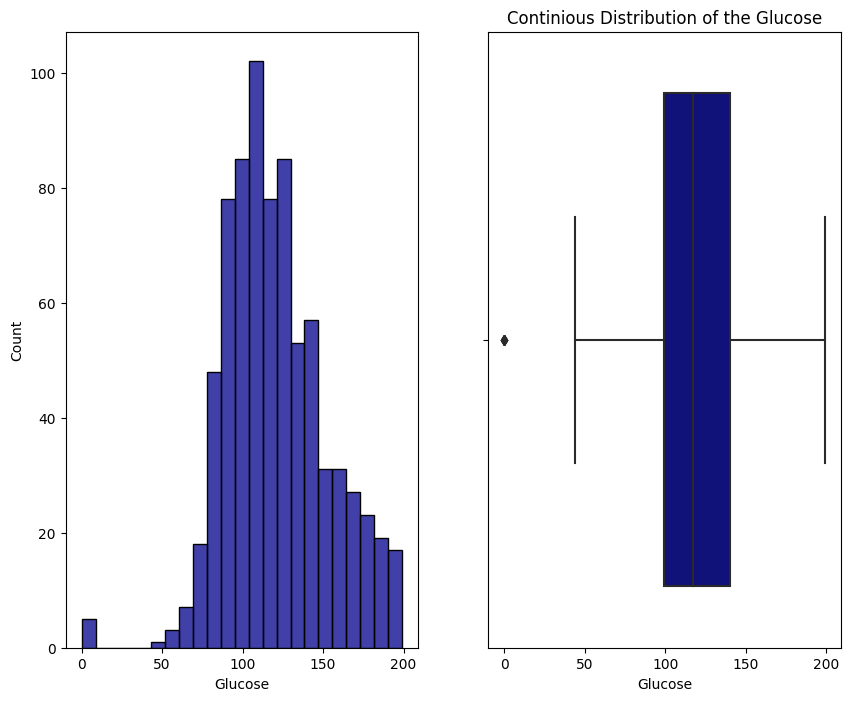

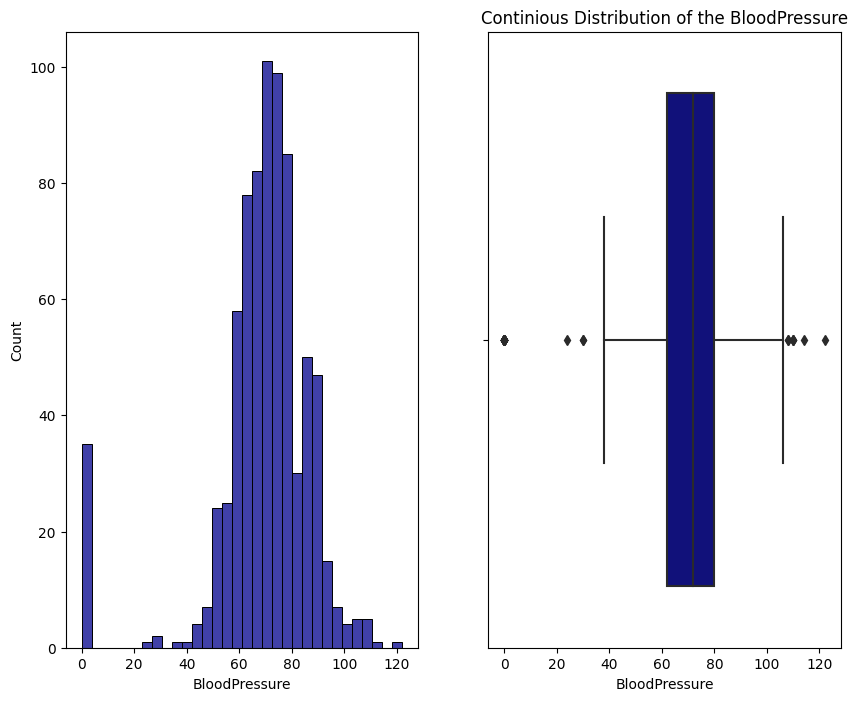

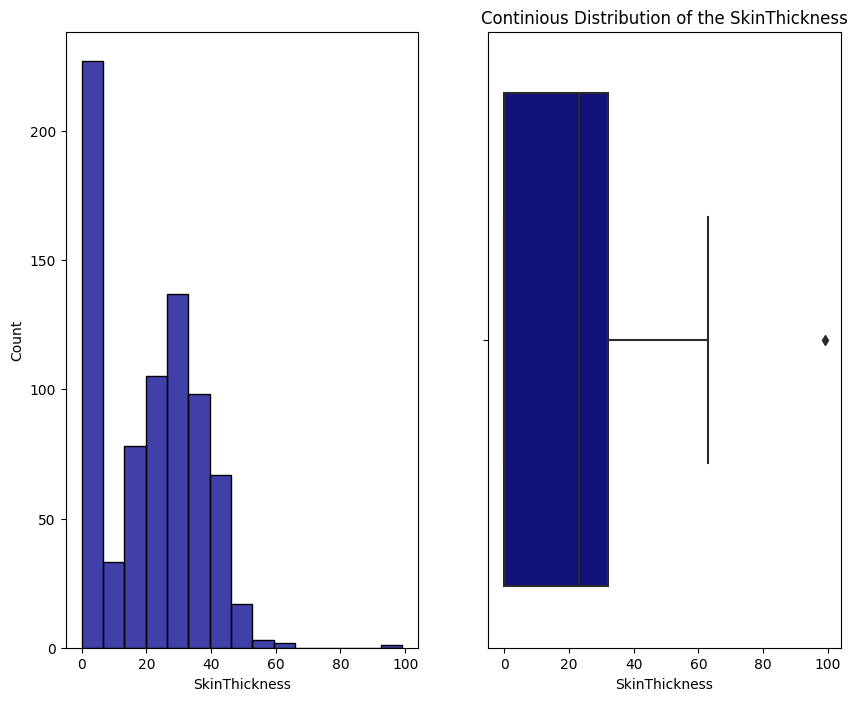

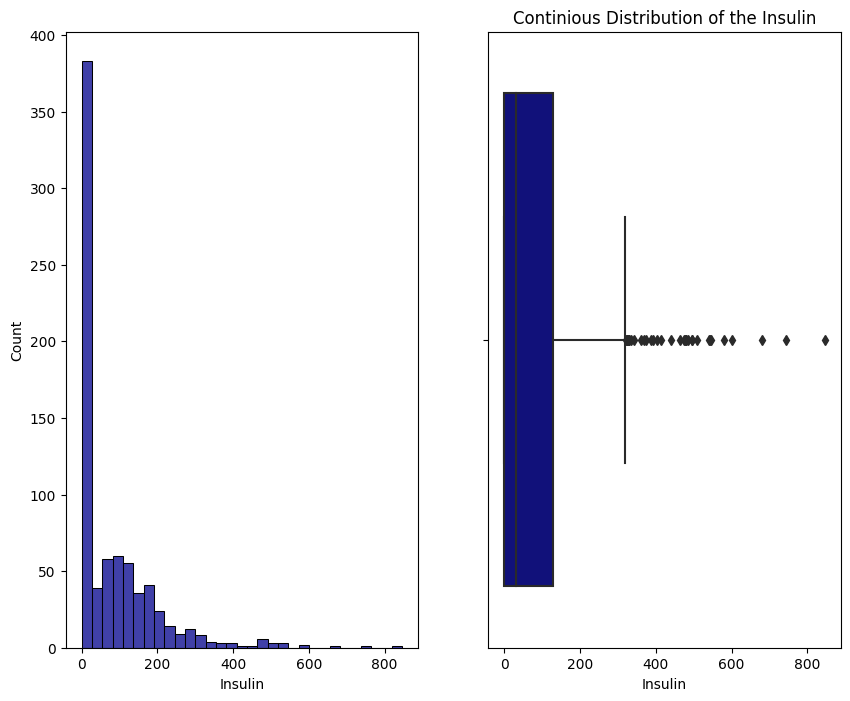

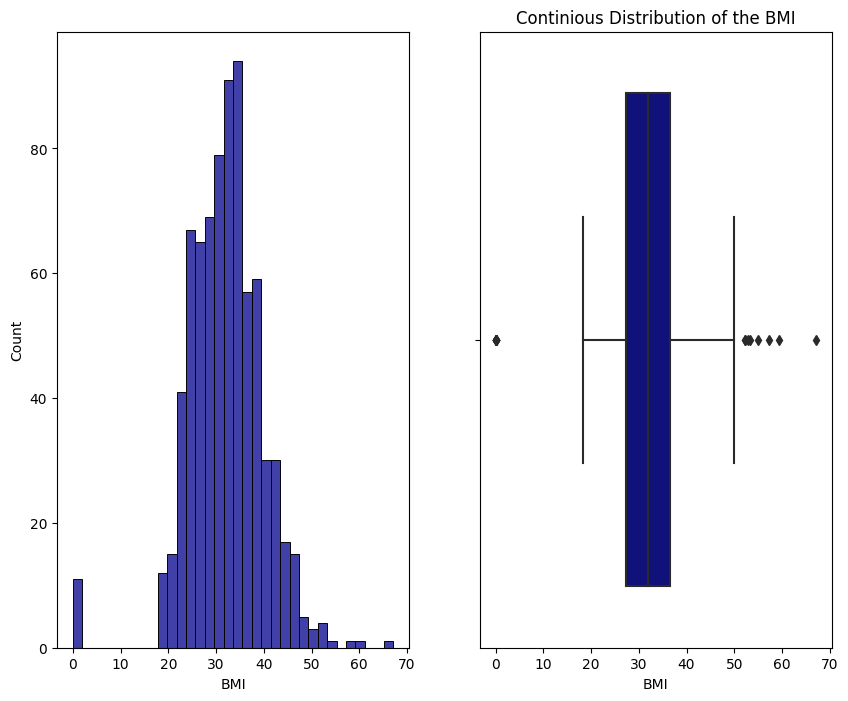

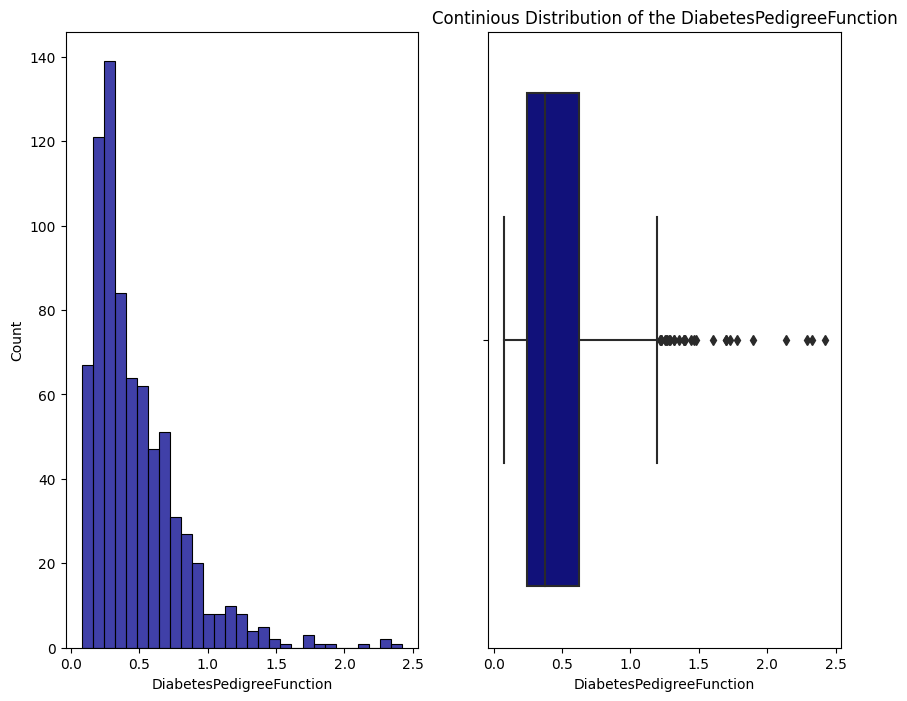

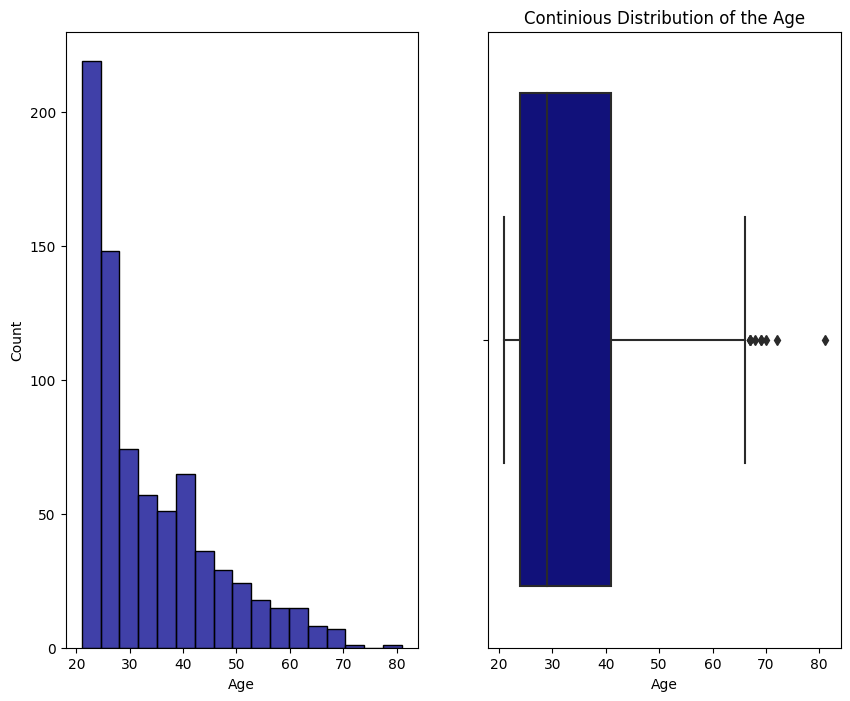

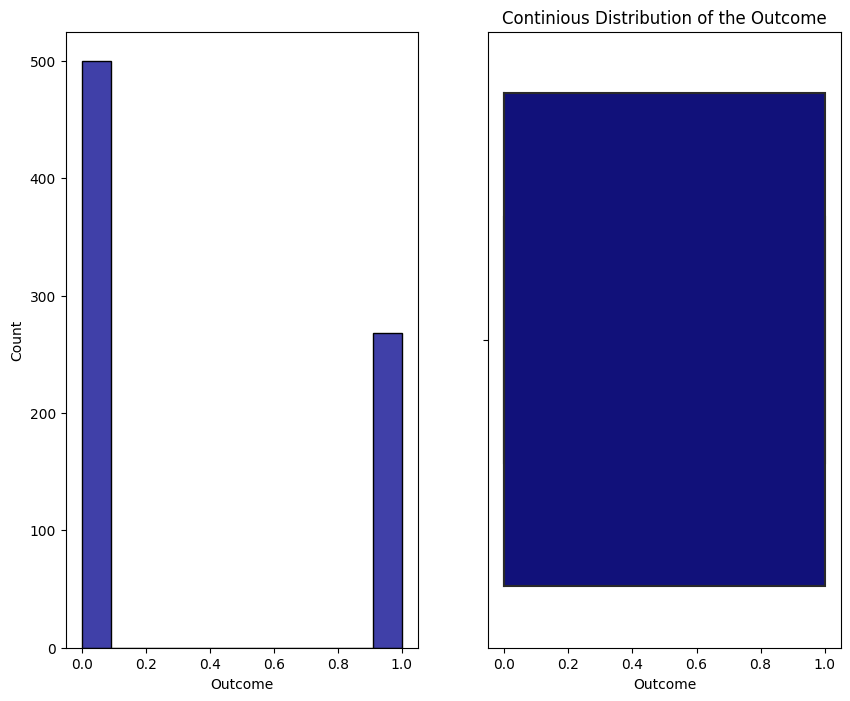

In [32]:
univariate_analysis(data)

# **Modelling**

In [33]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
data.shape

(768, 9)

In [35]:
# Separate the features and the target
# Separate X and y
X = data.drop(["Outcome"], axis =1 )
y = data["Outcome"]

In [36]:
X.shape

(768, 8)

In [37]:
y.shape

(768,)

In [38]:
# pip install sklearn

In [39]:
# Define the train and the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [41]:

model = LogisticRegression()

In [42]:
# Start the training
# you tell the model based on your X data what is the corresponding y or target
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Making predictions
predictions = model.predict(X_test)

In [44]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [45]:
y_test.values

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [46]:
# Checking the accruacy of the model

print("The accuracy of the logistic regression model is :", accuracy_score(predictions,y_test)*100)

The accuracy of the logistic regression model is : 79.87012987012987


# **Support Vector Machines**

In [47]:

model_svm = SVC()

# Start the training:
model_svm.fit(X_train,y_train)
svm_predictions = model_svm.predict(X_test)

In [48]:
svm_predictions_train = model_svm.predict(X_train)
print("The Training accuracy of the SVM model is :", accuracy_score(svm_predictions_train,y_train)*100)

The Training accuracy of the SVM model is : 76.38436482084691


In [49]:
print("The accuracy of the SVM model is :", accuracy_score(svm_predictions,y_test)*100)

The accuracy of the SVM model is : 78.57142857142857


In [50]:
log_reg_predictions_train = model.predict(X_train)
print("The Training accuracy of the Log Reg model is :", accuracy_score(log_reg_predictions_train,y_train)*100)

The Training accuracy of the Log Reg model is : 77.52442996742671


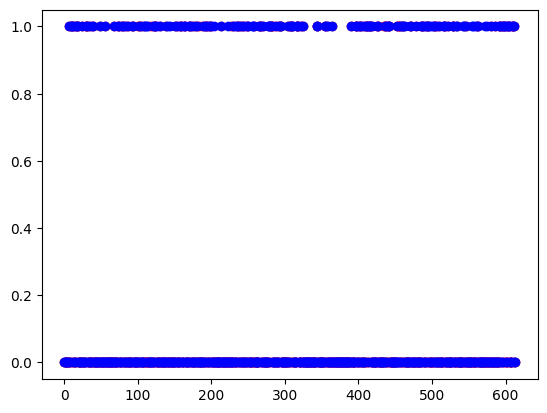

In [51]:
training_samples_index = range(0,len(y_train))
test_samples_index = range(0,len(y_test))
plt.scatter(training_samples_index, svm_predictions_train, color = "red")
plt.scatter(training_samples_index, log_reg_predictions_train, color = "blue")

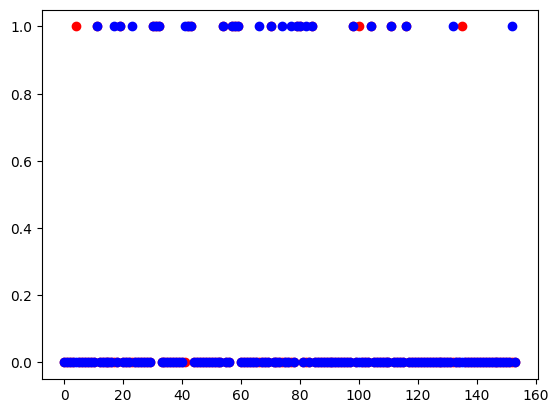

In [52]:
training_samples_index = range(0,len(y_train))
test_samples_index = range(0,len(y_test))
plt.scatter(test_samples_index, svm_predictions, color = "red")
plt.scatter(test_samples_index, predictions, color = "blue")

# **Decision Trees**

In [54]:
decision_tree = DecisionTreeClassifier()

In [55]:
# Start the Training:
decision_tree.fit(X_train , y_train)
# Getting predictions
dt_predictions = decision_tree.predict(X_test)

In [56]:
dt_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

# **Performimg Hyperparameter Tuning**

In [58]:
param_grid = {"criterion" : ["gini", "entropy", "log_loss"],
            "splitter" : ["best", "random"],
            "max_features" : ["auto", "sqrt", "log2"]}

grid_search  = GridSearchCV(estimator = decision_tree , param_grid = param_grid)
random_search = RandomizedSearchCV(estimator = decision_tree , param_distributions = param_grid)

In [59]:
# grid_search tuning
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [60]:
# grid_search tuning
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'splitter': ['best', 'random']})

In [61]:
random_search.best_params_

{'splitter': 'best', 'max_features': 'log2', 'criterion': 'log_loss'}

In [62]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}

In [63]:
dt_tuned_grid_search = DecisionTreeClassifier(criterion='log_loss',
                                              max_features= 'sqrt',
                                              splitter= 'best')

In [64]:
dt_tuned_random_search = DecisionTreeClassifier(criterion='gini',
                                              max_features= 'sqrt',
                                              splitter= 'best')

In [65]:
dt_tuned_grid_search.fit(X_train, y_train)
dt_tuned_random_search.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [66]:
tuned_dt_predictions_grid_search = dt_tuned_grid_search.predict(X_test)
tuned_dt_predictions_random_search = dt_tuned_random_search.predict(X_test)

In [67]:
print("Accuracy Score tuned_dt_predictions_grid_search :", accuracy_score(tuned_dt_predictions_grid_search,
                                                                          y_test))
print("Accuracy Score tuned_dt_predictions_random_search :", accuracy_score(tuned_dt_predictions_random_search,
                                                                          y_test))

Accuracy Score tuned_dt_predictions_grid_search : 0.7012987012987013
Accuracy Score tuned_dt_predictions_random_search : 0.7012987012987013


# **Random Forest Classifier**

In [69]:
random_forest = RandomForestClassifier()

In [70]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
# Getting the predictions for both train and test data
random_forest_predicitons_train = random_forest.predict(X_train)
random_forest_predicitons_test = random_forest.predict(X_test)

In [72]:
print("The random forest accuracy score in training data is : ", accuracy_score(random_forest_predicitons_train, y_train))
print("The random forest accuracy score in test data is : ", accuracy_score(random_forest_predicitons_test, y_test))

The random forest accuracy score in training data is :  1.0
The random forest accuracy score in test data is :  0.7727272727272727


# **Hyperparameter Tuning (Random Forest)**

In [74]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV

# param_grid = {"n_estimators" : [10,20,30,40,50,60,70,80,90,100],
#             "criterion" : ["gini", "entropy", "log_loss"],
#             "max_depth" : [1,2,3,4,5,6,7,8,9,10],
#             "max_features": ["sqrt", "log2", None]}

# grid_search  = GridSearchCV(estimator = random_forest , param_grid = param_grid)
# random_search = RandomizedSearchCV(estimator = random_forest , param_distributions = param_grid)
# # grid_search tuning
# grid_search.fit(X_train, y_train)
# # grid_search tuning
# random_search.fit(X_train, y_train)

In [75]:
# random_search.best_params_

In [76]:
# grid_search.best_params_

In [77]:
# random_forest_grid_search_tuned = RandomForestClassifier(criterion = 'entropy',
#                                                          max_depth = 5,
#                                                          max_features = None,
#                                                          n_estimators= 10)

In [78]:
# random_forest_random_search_tuned = RandomForestClassifier(criterion = 'log_loss',
#                                                          max_depth = 4,
#                                                          max_features = None,
#                                                          n_estimators= 20)

In [79]:
# random_forest_grid_search_tuned.fit(X_train, y_train)

In [80]:
# random_forest_random_search_tuned.fit(X_train, y_train)

In [81]:
# rf_tuned_grid_search_pred_train =random_forest_grid_search_tuned.predict(X_train)
# rf_tuned_random_search_pred_train =random_forest_random_search_tuned.predict(X_train)

In [82]:
# rf_tuned_grid_search_pred =random_forest_grid_search_tuned.predict(X_test)
# rf_tuned_random_search_pred =random_forest_grid_search_tuned.predict(X_test)

In [83]:
# print("The random forest accuracy score in training data is (RSCV): ", accuracy_score(rf_tuned_random_search_pred_train, y_train))
# print("The random forest accuracy score in test data is (RSCV): ", accuracy_score(rf_tuned_random_search_pred, y_test))

In [84]:
# print("The random forest accuracy score in training data is (GSCV): ", accuracy_score(rf_tuned_grid_search_pred_train, y_train))
# print("The random forest accuracy score in test data is : (GSCV)", accuracy_score(rf_tuned_grid_search_pred, y_test))

In [85]:
# data_rf_scores = {"Model": ["RF-Base", "RF-RSCV", "RF-GSCV"],
#                 "Train Score":[accuracy_score(random_forest_predicitons_train,y_train),
#                                 accuracy_score(rf_tuned_random_search_pred_train,y_train),
#                                 accuracy_score(rf_tuned_grid_search_pred_train,y_train)],
#                 "Test_Score": [accuracy_score(random_forest_predicitons_test,y_test),
#                                 accuracy_score(rf_tuned_random_search_pred,y_test),
#                                 accuracy_score(rf_tuned_grid_search_pred,y_test)]}

In [86]:
# pd.DataFrame(data_rf_scores)

# CatboostClassifier

In [95]:
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
cat_boost_clf =CatBoostClassifier()
xg_boost_classifier = XGBClassifier()

In [96]:
# Begin training for catboost
cat_boost_clf.fit(X_train, y_train)

Learning rate set to 0.008365
0:	learn: 0.6887745	total: 49.3ms	remaining: 49.3s
1:	learn: 0.6852868	total: 52.7ms	remaining: 26.3s
2:	learn: 0.6812513	total: 55ms	remaining: 18.3s
3:	learn: 0.6772460	total: 57.8ms	remaining: 14.4s
4:	learn: 0.6735288	total: 60.5ms	remaining: 12s
5:	learn: 0.6692726	total: 62.9ms	remaining: 10.4s
6:	learn: 0.6658221	total: 65.2ms	remaining: 9.24s
7:	learn: 0.6621491	total: 67.7ms	remaining: 8.39s
8:	learn: 0.6580729	total: 70.2ms	remaining: 7.73s
9:	learn: 0.6547257	total: 73ms	remaining: 7.23s
10:	learn: 0.6511247	total: 76.4ms	remaining: 6.87s
11:	learn: 0.6478674	total: 78.6ms	remaining: 6.47s
12:	learn: 0.6441688	total: 81.2ms	remaining: 6.16s
13:	learn: 0.6407091	total: 83.7ms	remaining: 5.89s
14:	learn: 0.6368613	total: 86ms	remaining: 5.65s
15:	learn: 0.6330223	total: 88.7ms	remaining: 5.46s
16:	learn: 0.6292344	total: 91.3ms	remaining: 5.28s
17:	learn: 0.6267707	total: 93.6ms	remaining: 5.11s
18:	learn: 0.6237440	total: 96.1ms	remaining: 4.96s


In [101]:
X_train["Pregnancies"] = X_train["Pregnancies"].astype(int)
X_test["Pregnancies"] = X_test["Pregnancies"].astype(int)

In [102]:
xg_boost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
catboost_predictions = cat_boost_clf.predict(X_test)

In [104]:
xg_boost_classifier_predictions = xg_boost_classifier.predict(X_test)

In [106]:
print("The accuracy score for xg_boost_classifier is :", accuracy_score(xg_boost_classifier.predict(X_train), y_train))
print("The accuracy score for catboost_predictions is :", accuracy_score(cat_boost_clf.predict(X_train), y_train))

The accuracy score for xg_boost_classifier is : 1.0
The accuracy score for catboost_predictions is : 0.9576547231270358


In [105]:
print("The accuracy score for xg_boost_classifier is :", accuracy_score(xg_boost_classifier_predictions, y_test))
print("The accuracy score for catboost_predictions is :", accuracy_score(catboost_predictions, y_test))

The accuracy score for xg_boost_classifier is : 0.7207792207792207
The accuracy score for catboost_predictions is : 0.7662337662337663
